In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
import osmnx as ox

In [2]:
#read in chicago labels
labels = gpd.read_file('data/processed-labels/labels_all_chicago/labels_all_chicago.shp')

In [3]:
labels

,audit_task,label_id,gsv_panora,label_type,severity,correct,high_quali,gsv_pano_1,zoom,heading,pitch,photograph,photogra_1,user_id,lat,lng,geometry
0,3,8,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,2.0,None,1,pMph48Z6Xz2hexFJ7q3d_Q,2,136.687500,-18.625000,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083668,-87.980347,POINT (-87.98035 42.08367)
1,3,9,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,1.0,1,1,pMph48Z6Xz2hexFJ7q3d_Q,2,249.937500,-14.125000,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083694,-87.980606,POINT (-87.98061 42.08369)
2,3,10,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,2.0,0,1,pMph48Z6Xz2hexFJ7q3d_Q,3,288.656250,-13.187500,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083786,-87.980606,POINT (-87.98061 42.08379)
3,3,11,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,3.0,1,1,pMph48Z6Xz2hexFJ7q3d_Q,3,49.245537,-16.220982,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083794,-87.980354,POINT (-87.98035 42.08379)
4,3,12,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,3.0,1,1,pMph48Z6Xz2hexFJ7q3d_Q,3,42.636162,-16.033482,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083817,-87.980362,POINT (-87.98036 42.08382)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,4588,21507,hhAF_qDTHgN0dL8SNsr-oA,SurfaceProblem,3.0,1,1,hhAF_qDTHgN0dL8SNsr-oA,1,126.341515,-32.937500,179.073898,0.395355,71959a82-3f47-4dec-a02b-86669bf8095b,41.611179,-87.664291,POINT (-87.66429 41.61118)
18281,4588,21508,hhAF_qDTHgN0dL8SNsr-oA,SurfaceProblem,2.0,None,1,hhAF_qDTHgN0dL8SNsr-oA,1,213.154022,-35.000000,179.073898,0.395355,71959a82-3f47-4dec-a02b-86669bf8095b,41.611137,-87.664551,POINT (-87.66455 41.61114)
18282,4589,21509,tZWhmOw4CIP9bQLJycSyqQ,CurbRamp,1.0,None,1,tZWhmOw4CIP9bQLJycSyqQ,3,217.380630,-16.302500,179.386520,-0.660645,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,41.609871,-87.646339,POINT (-87.64634 41.60987)
18283,4601,21517,nWTcoxo4S0MImzzvlQGwpQ,CurbRamp,1.0,1,1,nWTcoxo4S0MImzzvlQGwpQ,3,248.244995,-13.510625,359.491150,-0.079690,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,41.625626,-87.651291,POINT (-87.65129 41.62563)


In [5]:
sidewalk = gpd.read_file('data/chicago-osm-roads/chicago-osm-roads.shp')
sidewalk

,highway,osmid,geometry
0,residential,24072266,"LINESTRING (-87.97804 42.08236, -87.97804 42.0..."
1,service,889494360,"LINESTRING (-87.97804 42.08236, -87.97823 42.0..."
2,service,889494358,"LINESTRING (-87.97804 42.08236, -87.97823 42.0..."
3,service,889494359,"LINESTRING (-87.97804 42.08236, -87.97823 42.0..."
4,residential,24072266,"LINESTRING (-87.97804 42.08236, -87.97804 42.0..."
...,...,...,...
53597,service,1153985270,"LINESTRING (-87.64020 41.61787, -87.64021 41.6..."
53598,primary,360448907,"LINESTRING (-87.64023 41.61771, -87.64018 41.6..."
53599,primary,360448907,"LINESTRING (-87.64023 41.61771, -87.64038 41.6..."
53600,service,1153985271,"LINESTRING (-87.64023 41.61771, -87.64035 41.6..."


In [6]:
#Match coordinates
sidewalk = sidewalk.to_crs("EPSG:2285")
labels = labels.to_crs("EPSG:2285")

In [7]:
#Spatial join project sidewalk labels to sidewalk geometry
labels_mapped_on_sidewalk = labels.sjoin_nearest(sidewalk, distance_col='distance')
labels_mapped_on_sidewalk

,audit_task,label_id,gsv_panora,label_type,severity,correct,high_quali,gsv_pano_1,zoom,heading,pitch,photograph,photogra_1,user_id,lat,lng,geometry,index_right,highway,osmid,distance
0,3,8,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,2.0,None,1,pMph48Z6Xz2hexFJ7q3d_Q,2,136.687500,-18.625000,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083668,-87.980347,POINT (10336145.430 88630.219),1266,residential,24083864,26.937984
3,3,11,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,3.0,1,1,pMph48Z6Xz2hexFJ7q3d_Q,3,49.245537,-16.220982,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083794,-87.980354,POINT (10336124.440 88671.336),1266,residential,24083864,19.137887
1,3,9,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,1.0,1,1,pMph48Z6Xz2hexFJ7q3d_Q,2,249.937500,-14.125000,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083694,-87.980606,POINT (10336076.942 88609.813),967,footway,535325452,0.095994
872,207,942,FyTwj11KEhRgBFz5BAZQXg,CurbRamp,1.0,1,1,FyTwj11KEhRgBFz5BAZQXg,1,81.875000,-23.750000,301.418915,0.130981,814f4169-98a1-4afa-80da-3b46be1da405,42.083858,-87.981583,POINT (10335809.475 88554.169),967,footway,535325452,7.789930
873,207,943,FyTwj11KEhRgBFz5BAZQXg,CurbRamp,2.0,1,1,FyTwj11KEhRgBFz5BAZQXg,1,81.875000,-23.750000,301.418915,0.130981,814f4169-98a1-4afa-80da-3b46be1da405,42.083817,-87.981544,POINT (10335825.316 88544.486),967,footway,535325452,4.835947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,4588,21503,5XUiqq_KZD0TOFfl8RQ2RA,SurfaceProblem,2.0,1,1,5XUiqq_KZD0TOFfl8RQ2RA,1,109.091515,-25.812500,179.677460,0.077150,71959a82-3f47-4dec-a02b-86669bf8095b,41.611526,-87.664291,POINT (10486873.818 -32704.418),36750,residential,24081352,33.979134
18278,4588,21505,azH3XAm4QKnRlWXtJaiwxA,Obstacle,3.0,1,1,azH3XAm4QKnRlWXtJaiwxA,1,156.529022,-31.625000,179.852203,0.201590,71959a82-3f47-4dec-a02b-86669bf8095b,41.611179,-87.664299,POINT (10486925.083 -32820.927),36750,residential,24081352,32.448671
18280,4588,21507,hhAF_qDTHgN0dL8SNsr-oA,SurfaceProblem,3.0,1,1,hhAF_qDTHgN0dL8SNsr-oA,1,126.341515,-32.937500,179.073898,0.395355,71959a82-3f47-4dec-a02b-86669bf8095b,41.611179,-87.664291,POINT (10486926.990 -32820.050),36750,residential,24081352,34.547879
18281,4588,21508,hhAF_qDTHgN0dL8SNsr-oA,SurfaceProblem,2.0,None,1,hhAF_qDTHgN0dL8SNsr-oA,1,213.154022,-35.000000,179.073898,0.395355,71959a82-3f47-4dec-a02b-86669bf8095b,41.611137,-87.664551,POINT (10486868.571 -32863.846),36750,residential,24081352,36.756497


In [8]:
#select only label_id, distance
distance = labels_mapped_on_sidewalk[['label_id', 'distance']]

In [9]:
#drop duplicates
distance = distance.drop_duplicates()

In [10]:
# reset index
distance = distance.reset_index(drop=True)

In [11]:
distance

,label_id,distance
0,8,26.937984
1,11,19.137887
2,9,0.095994
3,942,7.789930
4,943,4.835947
...,...,...
18280,21499,22.874037
18281,21502,27.812788
18282,21503,33.979134
18283,21508,36.756497


<AxesSubplot: xlabel='distance', ylabel='Count'>

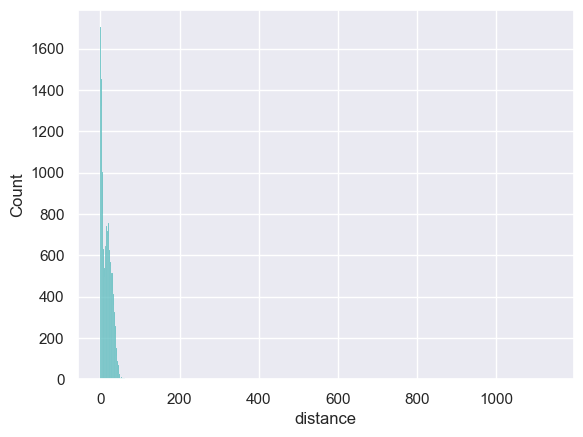

In [12]:
sns.histplot(data=distance, x="distance", color="#47B5B7")

In [13]:
# get the 95th percentile of the distance
distance_threshold = distance['distance'].quantile(0.95)
distance_threshold

38.000573978724994

<AxesSubplot: xlabel='distance', ylabel='Count'>

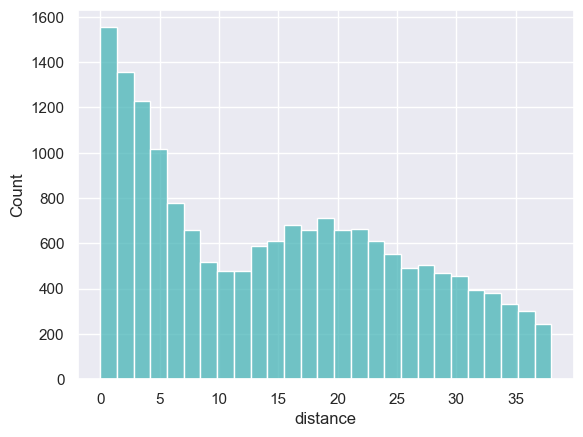

In [14]:
#plot only the labels that are within the 95th percentile
sns.histplot(data=distance[distance['distance'] < distance_threshold], x="distance", color="#47B5B7")


In [15]:
#calulate the 50%, 60%, 70% 80%, 90% percentile of the distance
distance_50 = labels_mapped_on_sidewalk['distance'].quantile(0.5)
distance_60 = labels_mapped_on_sidewalk['distance'].quantile(0.6)
distance_70 = labels_mapped_on_sidewalk['distance'].quantile(0.7)
distance_75 = labels_mapped_on_sidewalk['distance'].quantile(0.75)
distance_80 = labels_mapped_on_sidewalk['distance'].quantile(0.8)

Text(28.06028425396967, 0, '80%')

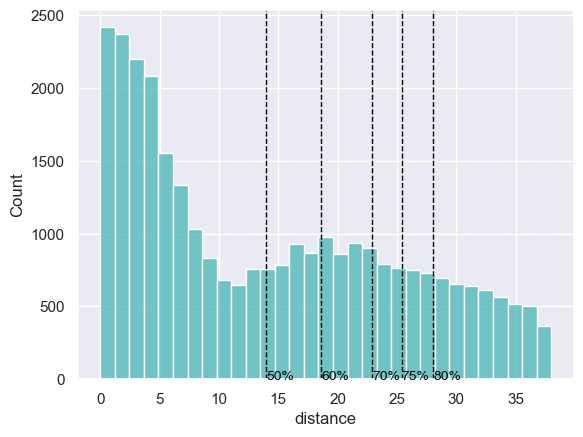

In [16]:
#calulate the 60%, 70%, 80%, 90% percentile of the distance and plot them as lines on the histogram
sns.histplot(data=labels_mapped_on_sidewalk[labels_mapped_on_sidewalk['distance'] < distance_threshold], x="distance", color="#47B5B7")
plt.axvline(distance_50, color='black', linestyle='dashed', linewidth=1)
plt.axvline(distance_60, color='black', linestyle='dashed', linewidth=1)
plt.axvline(distance_70, color='black', linestyle='dashed', linewidth=1)
plt.axvline(distance_75, color='black', linestyle='dashed', linewidth=1)
plt.axvline(distance_80, color='black', linestyle='dashed', linewidth=1)
# add x labels for the lines
plt.text(distance_50, 0, '50%', color='black', fontsize=10)
plt.text(distance_60, 0, '60%', color='black', fontsize=10)
plt.text(distance_70, 0, '70%', color='black', fontsize=10)
plt.text(distance_75, 0, '75%', color='black', fontsize=10)
plt.text(distance_80, 0, '80%', color='black', fontsize=10)



In [18]:
# save distance into a csv file
distance.to_csv('data/features/distance.csv', index=False)

In [17]:
#select the labels with distance > 35
labels_mapped_on_sidewalk[labels_mapped_on_sidewalk['distance'] > 50].explore(tiles='cartodbpositron', column = "label_type")